Indratanaya Budiman

24/534784/PA/22683



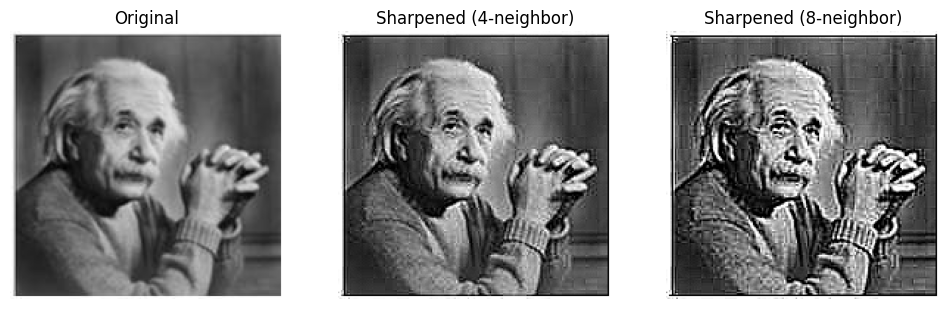

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

# Load grayscale image
img_path = "/content/ori_img.jpg"
img = Image.open(img_path).convert("L")
f = np.array(img, dtype=np.float32)

# Laplacian kernels
lap4 = np.array([[0,1,0],
                 [1,-4,1],
                 [0,1,0]])  # 4-neighbor

lap8 = np.array([[1,1,1],
                 [1,-8,1],
                 [1,1,1]])  # 8-neighbor

# Apply Laplacian
lap_res4 = convolve2d(f, lap4, mode='same', boundary='symm')
lap_res8 = convolve2d(f, lap8, mode='same', boundary='symm')

# Sharpening (rule: g = f - Laplacian)
g4 = f - lap_res4
g8 = f - lap_res8

# Clip results
g4 = np.clip(g4, 0, 255).astype(np.uint8)
g8 = np.clip(g8, 0, 255).astype(np.uint8)

# Display results
plt.figure(figsize=(12,6))
plt.subplot(1,3,1); plt.imshow(f, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(g4, cmap='gray'); plt.title("Sharpened (4-neighbor)"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(g8, cmap='gray'); plt.title("Sharpened (8-neighbor)"); plt.axis("off")
plt.show()


Laplacian method adalah operator diferensial kedua yang digunakan dalam pengolahan citra untuk mendeteksi tepi. Secara matematis, Laplacian menghitung perubahan intensitas piksel di sekitarnya. Ada 2 metode pengambilan pixel yang dapat digunakan, yaitu 4 neighbor dan 8 neighbor.

4-neighbor: hanya memperhitungkan piksel di atas, bawah, kiri, kanan (tetangga utama)

8-neighbor: memperhitungkan semua tetangga di sekeliling piksel, termasuk diagonal.

pada hasil tersebut, 8 neighbor terlihar lebih tajam karena 8-neighbor memperhitungkan diagonal sehingga semua arah tepi bisa dideteksi, tidak hanya horizontal atau vertikal.

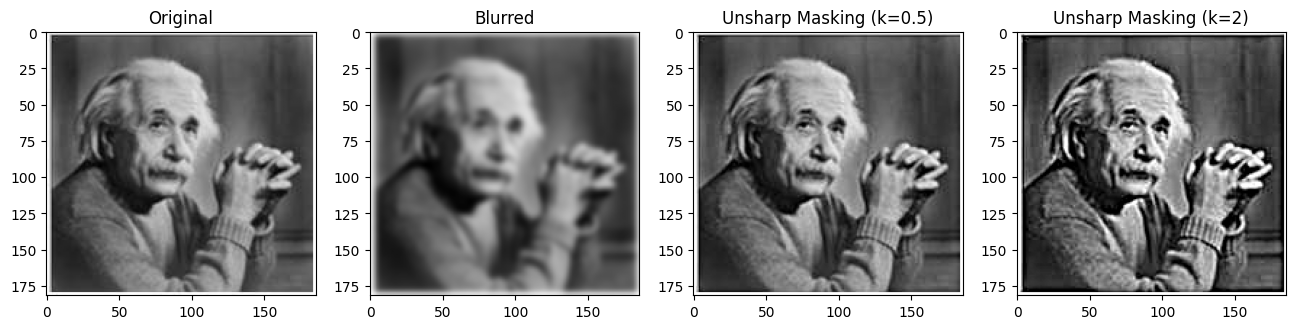

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Baca gambar grayscale

img_path = "/content/ori_img.jpg"
img = Image.open(img_path).convert("L")
img_array = np.array(img, dtype=np.float32)

# 1. Blur dengan Gaussian
blur = gaussian_filter(img_array, sigma=2)

# 2. Hitung mask
mask = img_array - blur

# 3. Unsharp Masking
k = 0.5  # faktor penguat
sharpened = img_array + k * mask

# 4. Clipping ke range [0,255]
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

l = 2  # faktor penguat
sharpened_2 = img_array + l * mask

sharpened_2 = np.clip(sharpened_2, 0, 255).astype(np.uint8)

# 5. Tampilkan
plt.figure(figsize=(16,6)) # Increased figure size to accommodate 4 plots
plt.subplot(1,4,1); plt.imshow(img_array, cmap='gray'); plt.title("Original")
plt.subplot(1,4,2); plt.imshow(blur, cmap='gray'); plt.title("Blurred")
plt.subplot(1,4,3); plt.imshow(sharpened, cmap='gray'); plt.title("Unsharp Masking (k=0.5)")
plt.subplot(1,4,4); plt.imshow(sharpened_2, cmap='gray'); plt.title("Unsharp Masking (k=2)")
plt.show()

Analisis :

Unsharp masking adalah teknik peningkatan ketajaman (sharpening) citra yang bekerja dengan cara menekankan tepi atau detail halus pada gambar.

Prinsip dasarnya adalah membuat versi buram (blurred) dari citra asli, kemudian mengurangkan citra buram ini dari citra asli untuk mendapatkan “mask” yang berisi tepi dan detail, lalu menambahkan mask ini kembali ke citra asli sehingga tepi menjadi lebih jelas.

Parameter k atau faktor penguatan (gain) mengontrol seberapa besar mask ini ditambahkan kembali ke citra. Semakin tinggi nilai k, semakin kuat penekanan pada perbedaan intensitas di tepi, sehingga gambar terlihat lebih tajam. Namun, nilai k yang terlalu tinggi juga bisa menimbulkan efek artefak atau noise yang berlebihan. (dapat diperhatikan pada penggunaan k = 2.

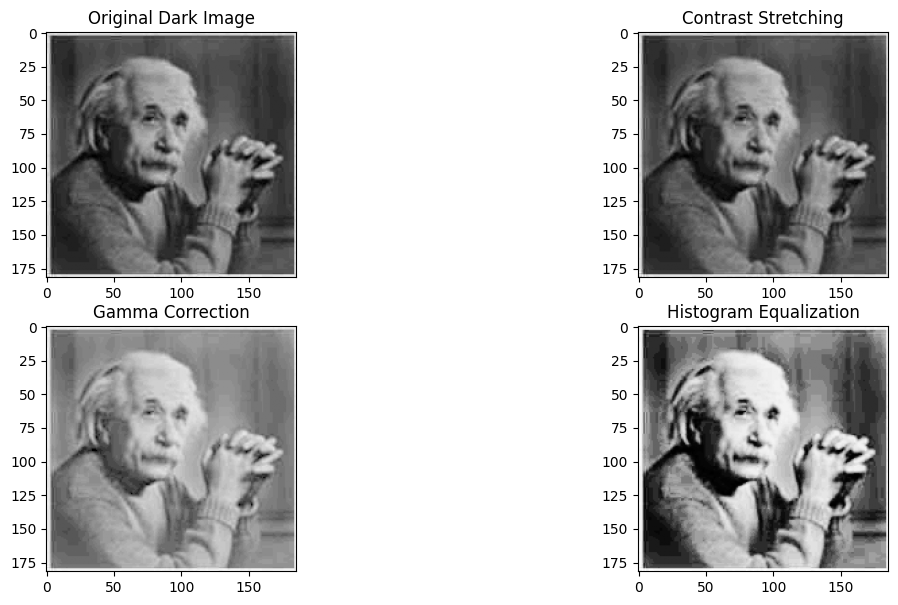

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load grayscale image
img_path = "/content/dark_img.jpg"
img = Image.open(img_path).convert("L")
f = np.array(img, dtype=np.float32)

# 1. Contrast Stretching
f_min, f_max = np.min(f), np.max(f)
stretch = ((f - f_min) / (f_max - f_min)) * 255
stretch = np.clip(stretch, 0, 255).astype(np.uint8)

# 2. Gamma Correction (gamma < 1 -> brightening)
gamma = 0.5
gamma_corrected = np.power(f/255.0, gamma) * 255
gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)

# 3. Histogram Equalization
hist, bins = np.histogram(f.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
hist_eq = cdf[f.astype('uint8')]

# Show results
plt.figure(figsize=(14,7))
plt.subplot(2,2,1); plt.imshow(f, cmap="gray"); plt.title("Original Dark Image")
plt.subplot(2,2,2); plt.imshow(stretch, cmap="gray"); plt.title("Contrast Stretching")
plt.subplot(2,2,3); plt.imshow(gamma_corrected, cmap="gray"); plt.title("Gamma Correction")
plt.subplot(2,2,4); plt.imshow(hist_eq, cmap="gray"); plt.title("Histogram Equalization")
plt.show()


Analisis:

Contrast Stretching

Menyebarkan intensitas piksel agar memanfaatkan seluruh rentang 0–255, meningkatkan kontras lokal. Dengan contrast strecthing, Gambar gelap menjadi lebih jelas dan detail di area gelap mulai terlihat.

Gamma Correction (𝛾=0.5)

Merupakan Transformasi non-linear 𝑓 out = 𝑓 in 𝛾 f out=f in γ untuk mencerahkan citra gelap tanpa mempengaruhi area terang secara drastis.Hasilnya Bayangan terlihat lebih terang dan detail muncul lebih halus dibanding contrast stretching.

Histogram Equalization

Menyebarkan intensitas piksel sehingga histogram mendekati distribusi seragam, meningkatkan kontras secara global.Menghasilkan Detail di area gelap maupun terang menonjol kontras citra paling tinggi, tetapi bisa memperkuat noise.

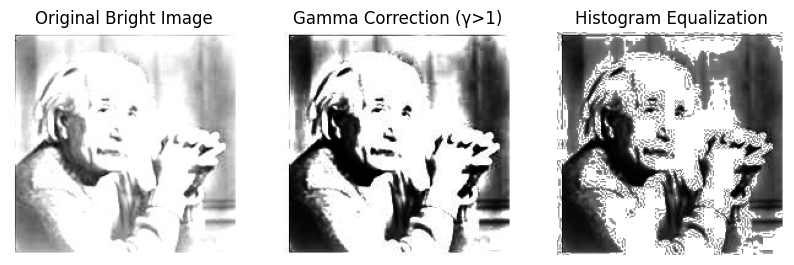

In [15]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load grayscale image
img_path = "/content/bright_img.jpg"
img = Image.open(img_path).convert("L")
f = np.array(img, dtype=np.float32)

# -------------------------
# 1. Gamma Correction (γ>1 untuk menggelapkan citra terang)
gamma = 4.0
gamma_corrected = np.power(f/255.0, gamma) * 255
gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)

# -------------------------
# 2. Histogram Equalization
hist, bins = np.histogram(f.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')
hist_eq = cdf[f.astype('uint8')]

# -------------------------
# Show results
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.imshow(f.astype(np.uint8), cmap="gray")
plt.title("Original Bright Image")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gamma_corrected, cmap="gray")
plt.title("Gamma Correction (γ>1)")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(hist_eq, cmap="gray")
plt.title("Histogram Equalization")
plt.axis("off")

plt.show()


Gamma Correction (𝛾=4.0)

Merupakan Transformasi non-linear 𝑓 out = 𝑓 in 𝛾 f out =f in γ dengan 𝛾 = 4 untuk mencerahkan citra gelap tanpa mempengaruhi area terang secara drastis.Hasilnya Bayangan terlihat lebih terang dan detail muncul lebih halus dibanding contrast stretching.

Histogram Equalization

Menyebarkan intensitas piksel sehingga histogram mendekati distribusi seragam, meningkatkan kontras secara global. menghasilakan citra dengan kontras meningkat, detail di area terang maupun bayangan menonjol; namun pada citra terang bisa membuat highlight tampak lebih “keras” atau kontras berlebihan.

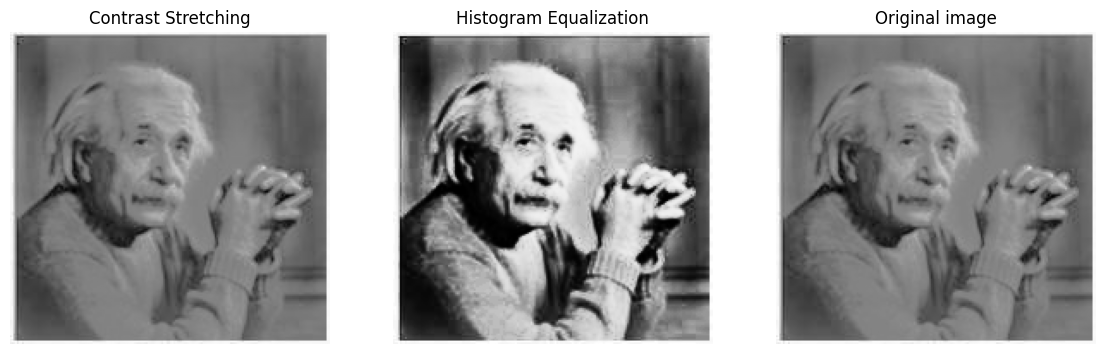

In [11]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load image (grayscale)
img_path = "/content/LowContrast_img.jpg"
img = Image.open(img_path).convert("L")
f = np.array(img, dtype=np.float32)

# -------------------------
# 1. Contrast Stretching
f_min, f_max = np.min(f), np.max(f)
contrast_stretch = ((f - f_min) / (f_max - f_min) * 255).astype(np.uint8)

# -------------------------
# 2. Histogram Equalization
hist, bins = np.histogram(f.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_m = np.ma.masked_equal(cdf, 0)  # mask zeros
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype(np.uint8)
hist_eq = cdf[f.astype(np.uint8)]

# -------------------------
# Show results
plt.figure(figsize=(14,7))
plt.subplot(1,3,1); plt.imshow(contrast_stretch, cmap="gray"); plt.title("Contrast Stretching"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(hist_eq, cmap="gray"); plt.title("Histogram Equalization"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(f.astype(np.uint8), cmap="gray"); plt.title("Original image"); plt.axis("off")
plt.show()


Analisis:

Contrast Stretching

Menyebarkan intensitas piksel agar memanfaatkan seluruh rentang 0–255, meningkatkan kontras lokal. Dengan contrast strecthing, Gambar gelap menjadi lebih jelas dan detail di area gelap mulai terlihat.

Histogram Equalization

Menyebarkan intensitas piksel sehingga histogram mendekati distribusi seragam, meningkatkan kontras secara global. menghasilkan detail di seluruh citra lebih menonjol dibanding contrast stretching, citra terlihat lebih “tajam” secara visual, namun bisa menimbulkan efek noise di area yang semula homogen.